In [3]:
!pip install pandas matplotlib seaborn scikit-learn numpy sqlalchemy

In [23]:
pip install Pandas Matplotlib Seaborn Scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv(r'C:\Users\ayush\Documents\Major project\Capstone project 2\crop yield data sheet.csv')

In [30]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Crop                  19689 non-null  object 
 1   Year                  19689 non-null  int64  
 2   Season                19689 non-null  object 
 3   State                 19689 non-null  object 
 4   Area                  19689 non-null  float64
 5   Production            19689 non-null  int64  
 6   Rainfall_mm           19689 non-null  float64
 7   Fertilizer_Used_kg    19689 non-null  float64
 8   Pesticide_Used_kg     19689 non-null  float64
 9   Yield_kg_per_hectare  19689 non-null  float64
 10  Farmer_ID             19689 non-null  object 
 11  Crop_Type             19689 non-null  object 
 12  Soil_Type             19689 non-null  object 
 13  Region                19689 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.1+ MB


In [32]:
# Total nulls per column
df.isnull().sum()

Crop                    0
Year                    0
Season                  0
State                   0
Area                    0
Production              0
Rainfall_mm             0
Fertilizer_Used_kg      0
Pesticide_Used_kg       0
Yield_kg_per_hectare    0
Farmer_ID               0
Crop_Type               0
Soil_Type               0
Region                  0
dtype: int64

In [33]:
(df.isnull().mean() * 100).round(2)

Crop                    0.0
Year                    0.0
Season                  0.0
State                   0.0
Area                    0.0
Production              0.0
Rainfall_mm             0.0
Fertilizer_Used_kg      0.0
Pesticide_Used_kg       0.0
Yield_kg_per_hectare    0.0
Farmer_ID               0.0
Crop_Type               0.0
Soil_Type               0.0
Region                  0.0
dtype: float64

In [34]:
# Columns with nulls only
df.columns[df.isnull().any()]

Index([], dtype='object')

# Q2

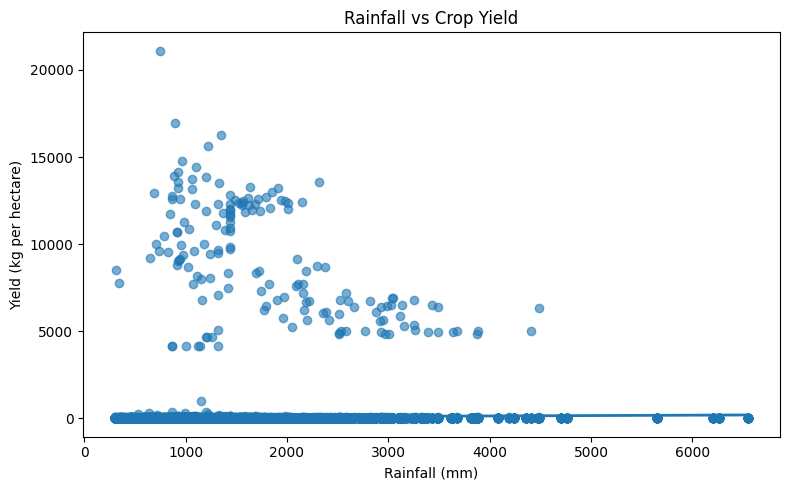

In [35]:
plt.figure(figsize=(8, 5))

sns.regplot(
    data=df,
    x="Rainfall_mm",
    y="Yield_kg_per_hectare",
    scatter_kws={"alpha": 0.6},
    line_kws={"linewidth": 2}
)

plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (kg per hectare)")
plt.title("Rainfall vs Crop Yield")

plt.tight_layout()
plt.show()


# 3Q

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [51]:
X = df[["Rainfall_mm", "Fertilizer_Used_kg", "Pesticide_Used_kg"]]
y = df["Yield_kg_per_hectare"]

In [52]:
X = X.fillna(X.median())
y = y.fillna(y.median())

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse

(0.0005248167143233617, np.float64(894.8851104107681))

# 4Q

In [57]:
cat_cols = ["Crop", "Region", "Soil_Type"]

In [58]:
df_encoded = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True
)

In [59]:
df_encoded.head()
df_encoded.shape

(19689, 73)

In [60]:
X = df_encoded.drop("Yield_kg_per_hectare", axis=1)
y = df_encoded["Yield_kg_per_hectare"]

# Q5

In [70]:
avg_yield = (
    df
    .groupby(["Crop", "Season"], as_index=False)
    ["Yield_kg_per_hectare"]
    .mean()
)

In [71]:
avg_yield["Yield_kg_per_hectare"] = avg_yield["Yield_kg_per_hectare"].round(2)

In [72]:
avg_yield.sort_values(["Crop", "Season"])

,Crop,Season,Yield_kg_per_hectare
0,Arecanut,Kharif,2.25
1,Arecanut,Rabi,1.07
2,Arecanut,Whole Year,2.17
3,Arhar/Tur,Autumn,0.20
4,Arhar/Tur,Kharif,0.81
...,...,...,...
227,Wheat,Winter,1.44
228,other oilseeds,Kharif,2.85
229,other oilseeds,Rabi,0.79
230,other oilseeds,Summer,0.76


# Q6. Create a heatmap of correlation matrix. 

In [75]:
# Selecting numeric columns only
numeric_df = df.select_dtypes(include="number")

In [78]:
# Computing correlation matrix
corr_matrix = numeric_df.corr()

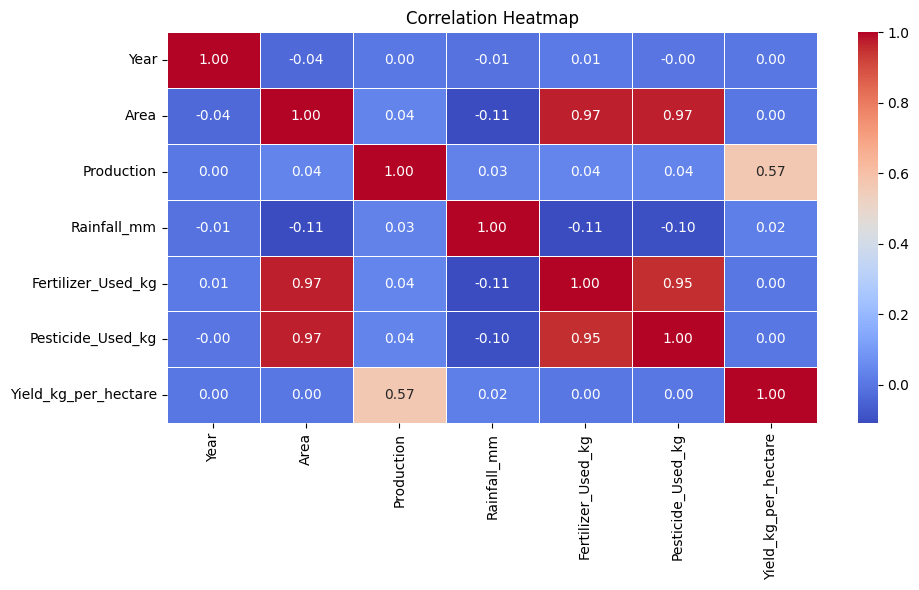

In [79]:
# Plot heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Q7. Build a decision tree to classify high vs low yield.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [82]:
# Creating target variable (High / Low Yield)
threshold = df["Yield_kg_per_hectare"].median()
df["High_Yield"] = (df["Yield_kg_per_hectare"] >= threshold).astype(int)

In [83]:
features = [
    "Rainfall_mm",
    "Fertilizer_Used_kg",
    "Pesticide_Used_kg",
    "Area",
    "Production"
]

X = df[features].fillna(df[features].median())
y = df["High_Yield"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [88]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [87]:
y_pred = dt_model.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy

0.8425596749619096

In [90]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1967
           1       0.92      0.75      0.83      1971

    accuracy                           0.84      3938
   macro avg       0.85      0.84      0.84      3938
weighted avg       0.85      0.84      0.84      3938



In [91]:
pd.Series(
    dt_model.feature_importances_,
    index=features
).sort_values(ascending=False)


Production            0.699905
Area                  0.298908
Pesticide_Used_kg     0.001187
Rainfall_mm           0.000000
Fertilizer_Used_kg    0.000000
dtype: float64

# Q8. Use matplotlib to visualize yield trends over years.

In [92]:
yearly_yield = (
    df
    .groupby("Year")["Yield_kg_per_hectare"]
    .mean()
    .sort_index()
)

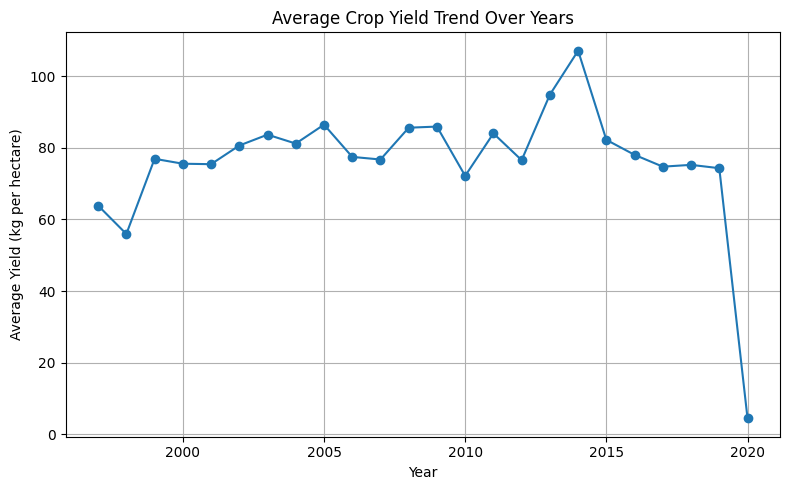

In [93]:
plt.figure(figsize=(8, 5))

plt.plot(
    yearly_yield.index,
    yearly_yield.values,
    marker='o'
)

plt.xlabel("Year")
plt.ylabel("Average Yield (kg per hectare)")
plt.title("Average Crop Yield Trend Over Years")

plt.grid(True)
plt.tight_layout()
plt.show()

# Q9. Deploy a function to flag outliers in fertilizer usage. 

In [94]:
def flag_fertilizer_outliers(
    df,
    column="Fertilizer_Used_kg",
    multiplier=1.5
):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr

    df = df.copy()
    df["Fertilizer_Outlier"] = (
        (df[column] < lower_bound) |
        (df[column] > upper_bound)
    )

    return df, lower_bound, upper_bound

In [96]:
df_flagged, lb, ub = flag_fertilizer_outliers(df)

In [99]:
df_flagged["Fertilizer_Outlier"].value_counts()

Fertilizer_Outlier
False    16596
True      3093
Name: count, dtype: int64

In [100]:
df_flagged[df_flagged["Fertilizer_Outlier"]]

,Crop,Year,Season,State,Area,Production,Rainfall_mm,Fertilizer_Used_kg,Pesticide_Used_kg,Yield_kg_per_hectare,Farmer_ID,Crop_Type,Soil_Type,Region,High_Yield,Fertilizer_Outlier
15,Rapeseed &Mustard,1997,Rabi,Assam,279292.0,154772,2051.4,2.658022e+07,86580.52,0.554783,F0016,Sugarcane,Clayey,South,0,True
16,Rice,1997,Autumn,Assam,607358.0,398311,2051.4,5.780226e+07,188280.98,0.780870,F0017,Pulses,Peaty,South,0,True
18,Rice,1997,Winter,Assam,1743321.0,1647296,2051.4,1.659119e+08,540429.51,0.941304,F0019,Rice,Peaty,North,0,True
28,Arhar/Tur,1997,Kharif,Karnataka,421810.0,98473,1266.7,4.014366e+07,130761.10,0.268235,F0029,Wheat,Sandy,Central,0,True
29,Bajra,1997,Kharif,Karnataka,301149.0,132056,1266.7,2.866035e+07,93356.19,0.404545,F0030,Maize,Loamy,North,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,Rice,2018,Autumn,Odisha,454370.0,527490,1635.9,7.369881e+07,159029.50,1.322917,F19671,Sugarcane,Sandy,South,1,True
19671,Rice,2018,Summer,Odisha,274230.0,925810,1635.9,4.448011e+07,95980.50,2.586071,F19672,Pulses,Loamy,East,1,True
19672,Rice,2018,Winter,Odisha,3130820.0,6280410,1635.9,5.078190e+08,1095787.00,1.982333,F19673,Rice,Clayey,West,1,True
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,2.958674e+07,96373.73,1.285000,F19687,Rice,Loamy,Central,1,True


# Q10. Export model predictions and summary stats to CSV for Power BI. 

In [102]:
#Creating predictions DataFrame
predictions_df = X_test.copy()
predictions_df["Actual_Yield"] = y_test.values
predictions_df["Predicted_Yield"] = y_pred
predictions_df["Residual"] = predictions_df["Actual_Yield"] - predictions_df["Predicted_Yield"]

In [103]:
# Exporting predictions for Power BI
predictions_df.to_csv(
    "yield_predictions_powerbi.csv",
    index=False
)

In [105]:
# Creating model summary statistics
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

summary_stats = pd.DataFrame({
    "Metric": ["R2_Score", "RMSE", "Mean_Actual_Yield", "Mean_Predicted_Yield"],
    "Value": [
        r2_score(y_test, y_pred),
        np.sqrt(mean_squared_error(y_test, y_pred)),
        y_test.mean(),
        y_pred.mean()
    ]
})

In [106]:
# Exporting summary stats
summary_stats.to_csv(
    "model_summary_stats_powerbi.csv",
    index=False
)